In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataset ->
UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

In [91]:
df = pd.read_csv('Concrete_Data.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


X = inputs/features (what goes into the model).
y = output/label (what the model should predict).

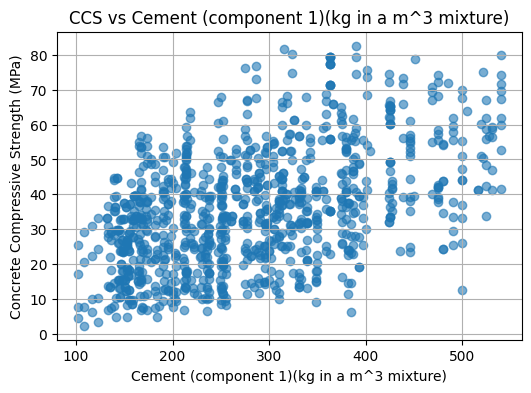

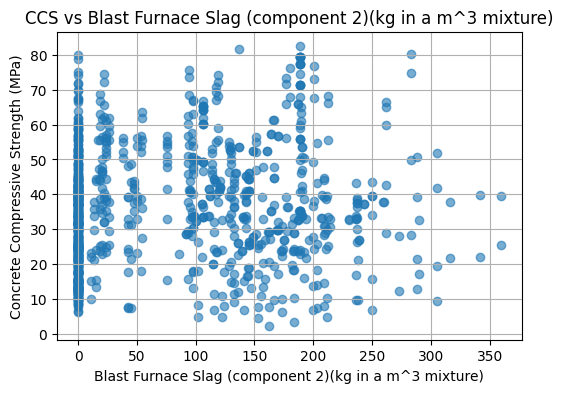

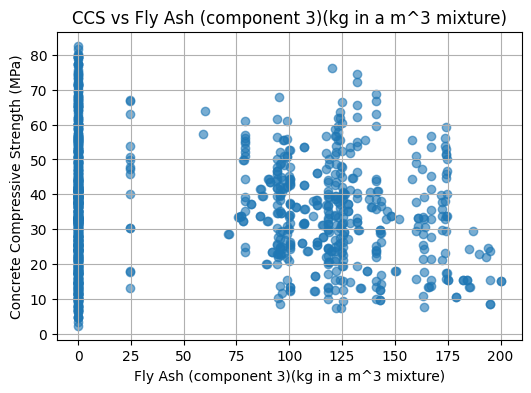

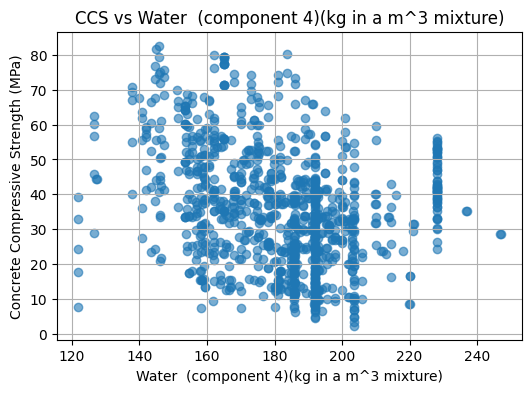

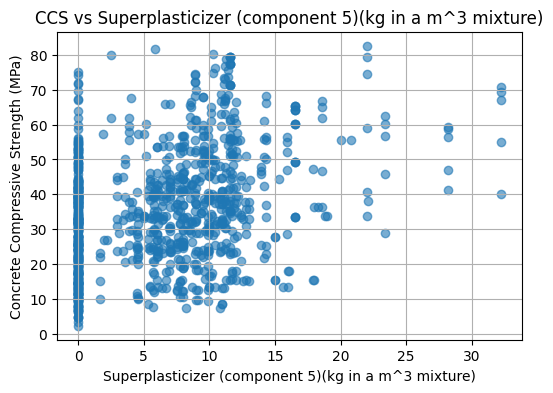

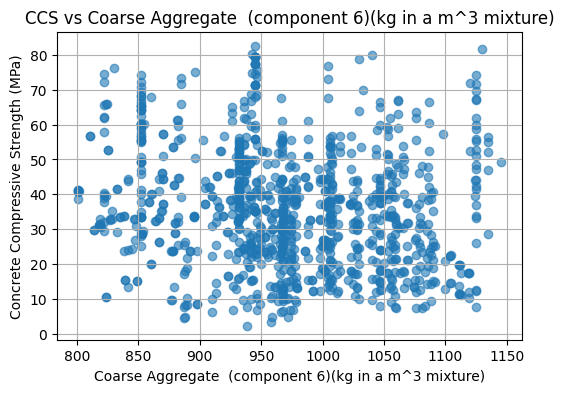

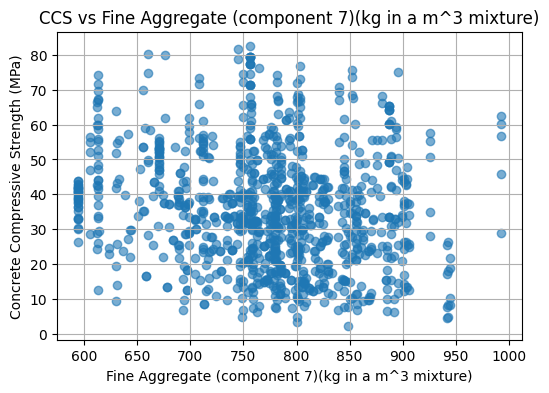

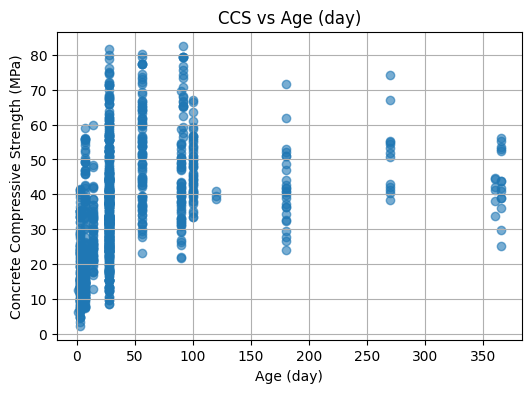

In [92]:
X = df.iloc[:, :-1]  # all rows, all columns except last
y = df.iloc[:, -1]   # all rows, last column (target)

for col in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[col], y, alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Concrete Compressive Strength (MPa)')
    plt.title(f'CCS vs {col}')
    plt.grid(True)
    plt.show()


**train_test_split** splits the dataset into training and testing parts.
**test_size=0.2** means 20% of the data goes to the test set and 80% to the training set.
**random_state=42** makes the split reproducible. If the code is run again, always get the same split (42 is just a seed number. can use any number).
When it shuffles, it keeps each row of X matched with the corresponding row in y.

In [93]:
from sklearn.model_selection import train_test_split

# X: 2D array with 8 features, y: 1D array with compressive strength values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data scaling and normalization.
**StandardScaler** is a part of scikit-learn preprocessing which standardizes features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
→ Create a scaler object (nothing happens yet).

scaler.fit_transform(X_train)

fit → calculate the mean & std for each feature (using only training data).

transform → apply the scaling using those values.

Result → X_train_scaled (same shape as X_train, but standardized).

scaler.transform(X_test)

Notice we only use transform, not fit_transform.

This applies the same scaling (from training set) to the test set keeping the test set unseen and prevents data leakage.

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kNN -> K-Nearest Neighbors ML model.
hyperparameter tuning with Grid Search for a KNN regressor.
param_grid → dictionary of parameters to try.
KNeighborsRegressor() → the ML model tuning.
GridSearchCV → systematically tries all parameter combinations you give it.
cv=5 → 5-fold cross-validation (data is split into 5 folds: train on 4, validate on 1, repeat 5 times).
scoring='r2' → evaluation metric is R² score (coefficient of determination).
grid.fit → Runs KNN with every k in 1…20, using cross-validation.
Finds the k that gives the best average R² score across the folds.
grid.best_params_ → tells you the best hyperparameter (best k).
grid.best_score_ → gives the best cross-validated R².
k_best → extracts just the number of neighbors.

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors': range(1, 21)}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')

grid.fit(X_train_scaled, y_train)

print("Best k:", grid.best_params_)
print("Best CV R²:", grid.best_score_)
k_best = grid.best_params_['n_neighbors']

Best k: {'n_neighbors': 4}
Best CV R²: 0.7045705421354226


Training the final KNN model with best k value

In [96]:
knn_model = KNeighborsRegressor(n_neighbors=k_best)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=4)

In [97]:
# Predict
y_pred = knn_model.predict(X_test_scaled)

In [98]:
y_pred

array([51.315 , 37.35  , 65.4225, 37.35  , 11.3875, 45.9325, 30.8875,
       49.645 , 24.395 , 39.2375, 41.96  , 20.36  , 58.1   , 56.5   ,
       37.225 , 31.595 , 31.9125, 17.1325, 39.5675, 34.705 , 26.0475,
       28.8725, 38.6075, 22.495 , 40.7375, 27.3025, 14.695 , 50.8825,
       51.82  , 25.645 , 37.8425, 29.4675, 38.88  , 51.41  , 34.705 ,
       38.21  , 22.64  , 46.905 , 12.0025, 40.76  , 19.375 , 11.1725,
       33.975 , 38.0425, 17.0975, 77.3   , 40.6525, 37.985 , 22.9025,
       13.4875, 58.8225, 45.2975, 32.5725, 21.8475, 46.3425, 44.4725,
       19.5425, 14.43  , 34.005 , 18.625 , 46.905 , 21.3975, 42.2   ,
       55.5225, 18.785 , 14.63  , 37.22  , 12.99  , 32.565 , 23.1625,
       16.5025, 15.22  , 10.165 , 41.96  , 25.565 , 22.02  , 49.015 ,
       48.2175, 46.245 , 15.5025, 38.4825, 45.8   , 33.9875, 34.355 ,
       45.635 , 37.35  , 32.245 , 33.43  , 17.64  , 21.175 , 29.7975,
       65.75  , 18.1875, 61.415 , 39.5675, 47.69  , 26.37  , 26.615 ,
       25.305 , 36.3

In [99]:
y_test

,"Concrete compressive strength(MPa, megapascals)"
31,52.91
109,55.90
136,74.50
88,35.30
918,10.54
...,...
482,56.14
545,18.75
110,38.00
514,74.36


Evaluation Performance Metrics

MAE (Mean Absolute Error) → average absolute difference between predicted and actual values. Lower = better.

RMSE (Root Mean Squared Error) → typical size of prediction errors, penalizing large errors. Lower = better.

R² (R-squared) → proportion of variance in target explained by the model. Closer to 1 = better.

r (Correlation coefficient) → strength and direction of linear relationship between predicted and actual values. Closer to 1 = better.

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
r = np.corrcoef(y_test, y_pred)[0, 1]

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, r: {r:.2f}")

MAE: 6.77, RMSE: 8.61, R²: 0.71, r: 0.85


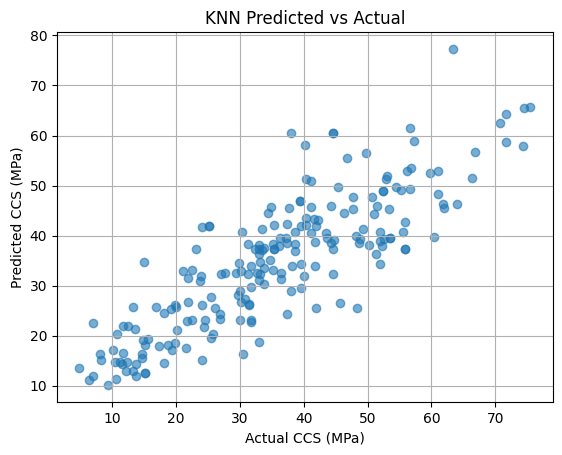

In [101]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual CCS (MPa)")
plt.ylabel("Predicted CCS (MPa)")
plt.title("KNN Predicted vs Actual")
plt.grid(True)
plt.show()

Save the trained model

In [102]:
import joblib

joblib.dump(knn_model, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_test_scaled, "X_test.pkl")
joblib.dump(y_test, "y_test.pkl")

['y_test.pkl']